In [6]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_parquet("2-renamed_car_data.parquet", index = 0)

# ProfileReport(data).to_file("cars_report_historical.html")

car_dict = pd.read_csv('2-data.dict.cars.added.fwd.csv')

To Pickup tomorrow 7/12:
1. set the datasets to be picked up here, created from 2
2. join the datasets and do advanced visualisation 
3. hopefully model

In [8]:
def collapse_wide_cols(data, columns, label):
    
    
    """Function checks that all one-hot encoded columns have a value, and labels it as a new variable.
        
    Parameters
    ----------
    df : pandas dataframe holding the columns wishing to shorten.
    columns : list of str
        List of columns labels to read from.
    label : str,
        Label for the collapsed new variable
        
    Returns
    -------
    If successful: a dataframe which has dropped one hot encoded variables and prints success
    if not successful: prints an error and the number of values that are missing a one hot encoded variable for review
    
    """
    
    subdf = data[columns].copy(deep=True)
        
    sum_value = subdf.values.sum() # adds all of the values in the column, there should only be a single 1 value for each variable category.
    
    if sum_value == len(data):    # if this number is equal to the length of the original dataframe it is good and merges
        def collapse(row):
            return(row.index[row.apply(lambda x: x==1)][0])
        
        subdf[label] = subdf.apply(lambda row: collapse(row), axis=1)
        
        subdf.drop(columns = columns, inplace = True)
        
        data = pd.concat([data, subdf.reset_index(drop=True)], axis = 1)
        print('correct data - merging')
        
        return data
    
    else: # if this number is not equal then it finds the bad rows and prints them out.
        bad_rows = data.loc[(data[columns].sum(axis=1) != 1), ]
        print('rows with missing values are...')
        display(bad_rows)
            

## Drivetrain feature

Need to collapse the drivetrain into long format

THere are 226 missing, this is a very bad data failure, something is wrong here. I think it is missing fwd.

In [9]:
drivetrain = data[(data['awd'] == 0) & (data['rwd'] == 0)]
print(str(len(drivetrain)) + ' vehicles with no drivetrain info')

226 vehicles with no drivetrain info


Correct, there are no drivetrain values in these cars. Need to build a new fwd feature and update the data dictionary to include it.

In [10]:
car_dict = pd.read_csv('2-data.dict.cars.added.fwd.csv')

In [11]:
def fwdvalue(data):
    if data['awd'] + data['rwd'] == 0:
        val = 1
    else:
        val = 0
    return val

In [12]:
data['fwd'] = data.apply(fwdvalue, axis=1)
checker = data[['awd', 'rwd', 'fwd']]

In [13]:
columns = car_dict.loc[car_dict.eval("category == 'drivetrain'"), "variable"]  #extract all of the drivetrain types from the data dictionary & keep the variable only that becomes columns
data_drivetrain = collapse_wide_cols(data, columns, label = "drivetrain")

data = data_drivetrain

data[['awd','rwd', 'fwd']].head(5)

correct data - merging


,awd,rwd,fwd
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1


drivetrain
awd     92
fwd    226
rwd    110
Name: drivetrain, dtype: int64

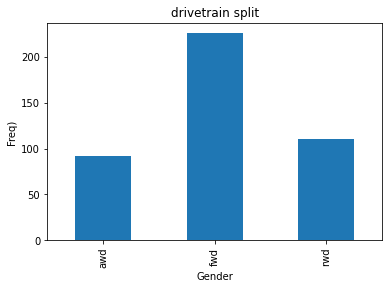

In [14]:
freq = data.groupby('drivetrain')['drivetrain'].count()
freq.plot(kind="bar", legend=None)
plt.xlabel("Gender")
plt.ylabel("Freq)")
plt.title("drivetrain split")

display(freq)

## Car Type

In [15]:
columns = car_dict.loc[car_dict.eval("category == 'car_type'"), "variable"]  #extract all of the drivetrain types from the data dictionary & keep the variable only that becomes columns
data_cartype = collapse_wide_cols(data, columns, label = "Car Type")
data_cartype

rows with missing values are...


,vehicle_name,sedan,sports_car,suv,wagon,minivan,pickup,awd,rwd,retail_price,...,cyl,hp,city_mpg,hwy_mpg,weight,wheel_base,len,width,fwd,drivetrain
22,Audi S4 Quattro 4dr,0,0,0,0,0,0,1,0,48040,...,8,340,14.0,20.0,3825.0,104.0,179.0,70.0,0,awd


In [16]:
cardata = data

t = cardata.loc[(cardata['vehicle_name'] == 'Audi S4 Quattro 4dr'), 'sedan'] == 1

cardata['sedan'].mask(cardata['vehicle_name'] == 'Audi S4 Quattro 4dr', 1, inplace=True)

cardata.head(23)

,vehicle_name,sedan,sports_car,suv,wagon,minivan,pickup,awd,rwd,retail_price,...,cyl,hp,city_mpg,hwy_mpg,weight,wheel_base,len,width,fwd,drivetrain
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,...,6,225,18.0,24.0,3880.0,115.0,197.0,72.0,1,fwd
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,...,6,225,18.0,24.0,3893.0,115.0,197.0,72.0,1,fwd
2,Acura MDX,0,0,1,0,0,0,1,0,36945,...,6,265,17.0,23.0,4451.0,106.0,189.0,77.0,0,awd
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,...,6,290,17.0,24.0,3153.0,100.0,174.0,71.0,0,rwd
4,Acura RSX Type S 2dr,1,0,0,0,0,0,0,0,23820,...,4,200,24.0,31.0,2778.0,101.0,172.0,68.0,1,fwd
5,Acura TL 4dr,1,0,0,0,0,0,0,0,33195,...,6,270,20.0,28.0,3575.0,108.0,186.0,72.0,1,fwd
6,Acura TSX 4dr,1,0,0,0,0,0,0,0,26990,...,4,200,22.0,29.0,3230.0,105.0,183.0,69.0,1,fwd
7,Audi A4 1.8T 4dr,1,0,0,0,0,0,0,0,25940,...,4,170,22.0,31.0,3252.0,104.0,179.0,70.0,1,fwd
8,Audi A4 3.0 4dr,1,0,0,0,0,0,0,0,31840,...,6,220,20.0,28.0,3462.0,104.0,179.0,70.0,1,fwd
9,Audi A4 3.0 convertible 2dr,1,0,0,0,0,0,0,0,42490,...,6,220,20.0,27.0,3814.0,105.0,180.0,70.0,1,fwd


In [41]:
columns = car_dict.loc[car_dict.eval("category == 'car_type'"), "variable"]  #extract all of the drivetrain types from the data dictionary & keep the variable only that becomes columns
data_cartype = collapse_wide_cols(data, columns, label = "Car Type")
cars = data_cartype

cars.head(4)

correct data - merging


,vehicle_name,sedan,sports_car,suv,wagon,minivan,pickup,awd,rwd,retail_price,...,hp,city_mpg,hwy_mpg,weight,wheel_base,len,width,fwd,drivetrain,Car Type
0,Acura 3.5 RL 4dr,1,0,0,0,0,0,0,0,43755,...,225,18.0,24.0,3880.0,115.0,197.0,72.0,1,fwd,sedan
1,Acura 3.5 RL w/Navigation 4dr,1,0,0,0,0,0,0,0,46100,...,225,18.0,24.0,3893.0,115.0,197.0,72.0,1,fwd,sedan
2,Acura MDX,0,0,1,0,0,0,1,0,36945,...,265,17.0,23.0,4451.0,106.0,189.0,77.0,0,awd,suv
3,Acura NSX coupe 2dr manual S,0,1,0,0,0,0,0,1,89765,...,290,17.0,24.0,3153.0,100.0,174.0,71.0,0,rwd,sports_car


### Need to join datasets

There is one car value which is missing and needs to be re-added

In [25]:
people = pd.read_parquet('1-people.parquet')
people[people['car'].str.contains("Cadillac")]

,id,age,salary,height,family_size,location,sex,car
4,5,17,86111,163,3,urban,male,Cadillac XLR convertible 2dr
85,86,54,69539,168,1,rural,male,Cadillac Escalade


In [28]:
people.replace('Cadillac Escalade', 'Cadillac Escalade EXT', inplace = True)
people[people['car'].str.contains("Cadillac")]

,id,age,salary,height,family_size,location,sex,car
4,5,17,86111,163,3,urban,male,Cadillac XLR convertible 2dr
85,86,54,69539,168,1,rural,male,Cadillac Escalade EXT


Join

In [45]:
joined_data = people.merge(cars, left_on="car", right_on="vehicle_name", how="left")

In [48]:
joined_data.shape

(101, 31)

In [49]:
joined_data.drop_duplicates(subset=None, keep='first', inplace=True)
joined_data.head(3)

,id,age,salary,height,family_size,location,sex,car,vehicle_name,sedan,...,hp,city_mpg,hwy_mpg,weight,wheel_base,len,width,fwd,drivetrain,Car Type
0,1,18,32354,151,4,urban,male,Toyota Celica GT-S 2dr,Toyota Celica GT-S 2dr,0,...,180,24.0,33.0,2500.0,102.0,171.0,68.0,1,fwd,sports_car
1,2,57,32471,181,3,rural,female,Ford Crown Victoria 4dr,Ford Crown Victoria 4dr,1,...,224,17.0,25.0,4057.0,115.0,212.0,78.0,0,rwd,sedan
2,3,21,90452,151,1,rural,male,BMW Z4 convertible 2.5i 2dr,BMW Z4 convertible 2.5i 2dr,0,...,184,20.0,28.0,2932.0,98.0,161.0,70.0,0,rwd,sports_car


Extract Car model

In [59]:
joined_data['make'] = joined_data['car'].str.split(' ').str[0]
joined_data.head(3)

,id,age,salary,height,family_size,location,sex,car,vehicle_name,sedan,...,city_mpg,hwy_mpg,weight,wheel_base,len,width,fwd,drivetrain,Car Type,make
0,1,18,32354,151,4,urban,male,Toyota Celica GT-S 2dr,Toyota Celica GT-S 2dr,0,...,24.0,33.0,2500.0,102.0,171.0,68.0,1,fwd,sports_car,Toyota
1,2,57,32471,181,3,rural,female,Ford Crown Victoria 4dr,Ford Crown Victoria 4dr,1,...,17.0,25.0,4057.0,115.0,212.0,78.0,0,rwd,sedan,Ford
2,3,21,90452,151,1,rural,male,BMW Z4 convertible 2.5i 2dr,BMW Z4 convertible 2.5i 2dr,0,...,20.0,28.0,2932.0,98.0,161.0,70.0,0,rwd,sports_car,BMW


Text(0.5, 1.0, 'Most popular makes amongst population')

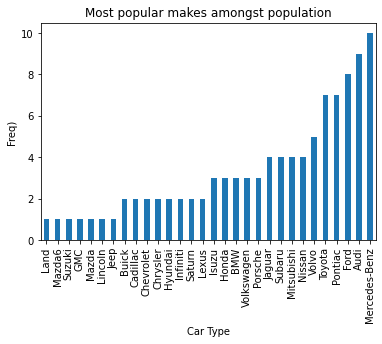

In [61]:
freq = joined_data.groupby('make')['make'].count().sort_values()
freq.plot(kind="bar", legend=None)
plt.xlabel("Car Type")
plt.ylabel("Freq)")
plt.title("Most popular makes amongst population")

In [62]:
joined_data.to_parquet('3-joined_data_for_modelling.parquet')